# Term Deposit Marketing

# Ojectif

The main objective of this project is to develop a robust machine learning system that leverages information coming from call center data. The goal of the model is to improve the success rate for calls made to customers for any product that the clients offer.    
The model aims then to offer high success outcomes and interpretability for clients to make an informed decision.  
Therefore, the used data comes from a campaign that involves making a phone call to a customer, often multiple times to ensure a term deposit subscription. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds, only after the term ends.     
This notebook demonstrates how did I use Machine Learning as well as Exploratory Data Analysis techniques to help the company much classify its customers, and then make pertinent decisions.   
Below, these are the main steps followed to solve the problem:
* First, create a virtual environment using conda command line with a version of python 3.6.
* load required libraries and models.
* Exploring, visualizing, describing, and understanding the dataset.
* Reporting analysis and removing outliers.
* Splitting the dataset into Train and Test sets as well as fixing the imbalanced issue.
* Testing different Machine Learning pipelines with pycaret and ensemble learning methods.
* Evaluating models and analyzing results.
* Clustering positive customers to determine the segment of customers the client should prioritize.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pycaret.classification import *
from pycaret.utils import check_metric
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [2]:
data=pd.read_csv("term-deposit-marketing-2020.csv")

In [3]:
#Explore first five first rows of our dataset
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no

# I. Exploratory Data Analysis

### 1- Data shape analysis:
- **Target Variable**: y
- **Lines and columns**: 40000 lines, 14 columns
- **Types of variables**: 5 Quantitative variables, 9 Qualitative variables 
- **Missing values analysis**: Ther is no missing values in the dataframe.

### 2- Background analysis
- **Visualization of the target**:
     - 92% negative and 8% positive: imbalanced dataset
- **Meaning of variables**:  
     - Highest age group is between 30 and 40.
     - Qualitatives variables: 5 binary variables, and 4 multi categorical variables
- **Variables / target relationship**:
     - The rate of duration seems related to the subscription of customers.
     

### 1- Data Shape analysis

In [4]:
#copy the dataset in df dataframe
df=data.copy()


> ##### From the code below, we can see that the data contains 40000 lines and 14 columns.

In [5]:
#see the shape of the dataframe
df.shape

(40000, 14)

▶ Here is the meaning of each variable in the data: 
  
* age: age of customer (numeric)

* job: type of job (categorical)

* marital: marital status (categorical)

* education (categorical)

* Default: has credit in default? (binary)

* balance: average yearly balance, in euros (numeric)

* housing: has a housing loan? (binary)

* loan: has personal loan? (binary)

* Contact: contact communication type (categorical)

* day: last contact day of the month (numeric)

* month: last contact month of the year (categorical)

* duration: last contact duration, in seconds (numeric)

* campaign: number of contacts performed during this campaign and for this client (numeric, includes the last contact)

* y (output): has the client subscribed to a term deposit? (binary)

  There are 5 Quantitative variables (age, balance, day, duration, and campaign). The other 9 variables are Qualitative.

In [6]:
df.dtypes.value_counts()

object    9
int64     5
dtype: int64

#### Missing values

* Check if there are some missing values. 

In [7]:
#check missing values in the dataframe
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

* Likely, there are no missing values in the dataframe. However, there are null values in some features: 3209 in Balance and 3 in duration. Let's see a portion of these sub_datasets.

In [8]:
#check null values in the dataframe
df[df==0].count()

age             0
job             0
marital         0
education       0
default         0
balance      3209
housing         0
loan            0
contact         0
day             0
month           0
duration        3
campaign        0
y               0
dtype: int64

Let's analyze this result by checking clients that have a null duration. We can infer that the three clients whose last call duration was null didn't subscribe, which is normal as they didn't reply to the calls.

In [9]:
df[df['duration'] == 0]

age           job  marital  education default  balance housing loan  \
6424    53    management  married    primary      no      351     yes   no   
22937   35    technician  married  secondary      no     5535      no   no   
36425   31  entrepreneur  married  secondary      no      162     yes  yes   

        contact  day month  duration  campaign   y  
6424    unknown   27   may         0         4  no  
22937  cellular   26   aug         0        15  no  
36425  cellular   11   may         0         2  no

From the balance feature, we can infer that about 9% percent of clients have a negative balance, and about 8% have a null balance. Also, about 94% of clients didn't subscribe for both cases.   

In [10]:
df[df['balance'] < 0].shape[0]/df.shape[0]

0.093275

In [11]:
df[df['balance'] == 0].shape[0]/df.shape[0]

0.080225

In [12]:
balance=df[df['balance']== 0]
print(balance['y'].value_counts(normalize=True))

no     0.944219
yes    0.055781
Name: y, dtype: float64


In [13]:
balance=df[df['balance']< 0]
print(balance['y'].value_counts(normalize=True))

no     0.947199
yes    0.052801
Name: y, dtype: float64


In [14]:
#describe the df
df.describe(include='all')
df.describe()

age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000

From the cell above, we can infer that truly, there is no missing values as the count value is the same for all the features of the dataframe.



### Target review




*   From the cell below, we can see that 92% of clients didn't subscribe to a term deposit. So the classes are not balanced. So we should use afterwards an other metric different from the accuracy,either recall, precision or f1 score.

no     0.9276
yes    0.0724
Name: y, dtype: float64


<AxesSubplot:>

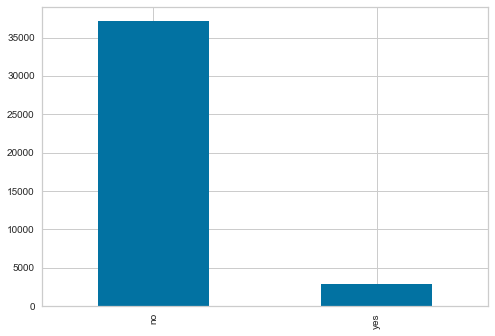

In [15]:
print(df['y'].value_counts(normalize=True))
df['y'].value_counts().plot.bar()

Now, let's analyse the features of our dataset each other.

### 1- Univariate Analysis:

### a- Categorical Unordered Univariate Analysis:

* Let's first explore unique values in categorical features.

In [16]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

job----------------------------------------------- ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital------------------------------------------- ['married' 'single' 'divorced']
education----------------------------------------- ['tertiary' 'secondary' 'unknown' 'primary']
default------------------------------------------- ['no' 'yes']
housing------------------------------------------- ['yes' 'no']
loan---------------------------------------------- ['no' 'yes']
contact------------------------------------------- ['unknown' 'cellular' 'telephone']
month--------------------------------------------- ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
y------------------------------------------------- ['no' 'yes']


From the results below, we can see that qualitative variables are divided into 2 groups: 5 binary variables, and 4 multi categorical variables

#### Therefore, the job, marital, and contact columns in our dataset are divided into many sub-categories. There is no weight or measure given to any values in these columns, so they are unordered features. 
- Now, let’s analyze these categories by using plots. Since they are categories, we will plot the bar plot.

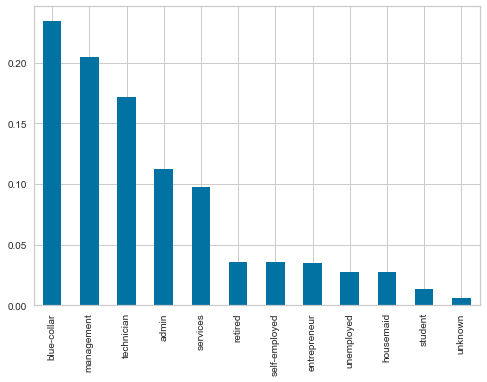

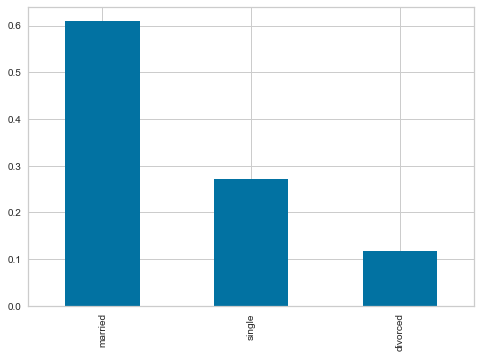

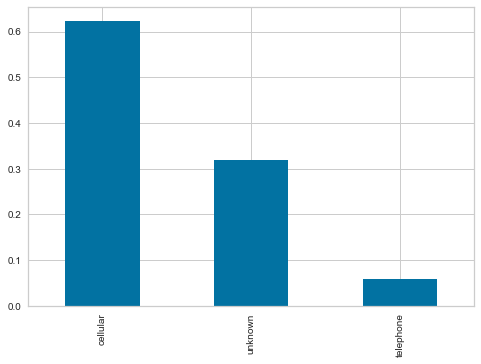

In [17]:
for col in df[['job','marital','contact']].columns.values.tolist():
    df[col].value_counts(normalize=True).plot.bar()
    plt.show()

* By the above bar plots, we can infer that the dataset contains more number of blue-collar and management workers compared to other categories in the job feature, also marital category is the most existing category in the marital feature, and then also most of the clients have cellular contact compared to other categories.

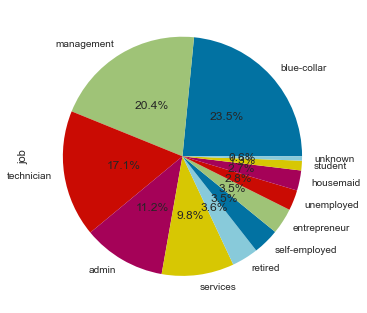

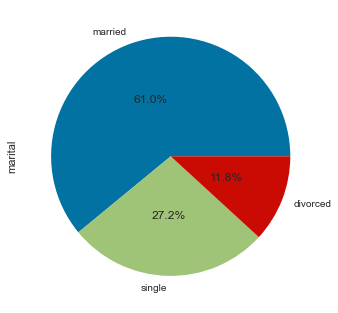

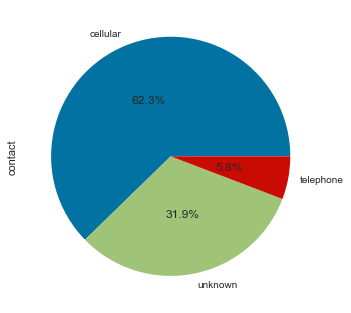

In [18]:
for col in df[['job','marital','contact']].columns.values.tolist():
    plt.figure()
    df[col].value_counts().plot.pie(autopct="%.1f%%", pctdistance=0.5)

* The above pie charts show better the percentage of the distribution of categories in these 3 features.     
    -job variable: 23.5% blue_collar and 20.4% management  
    -marital variable: 61% of clients are married   
    -contact variable: 62.3% of clients have cellular contact

### b- Categorical Ordered Univariate Analysis:

* Ordered variables are those variables that have a natural rank of order. Month and Education are examples of categorical ordered variables from our dataset. Let’s analyze these variables.  

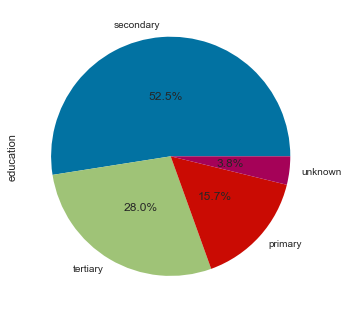

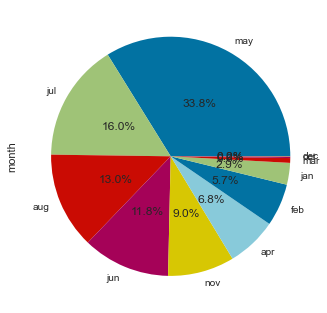

In [19]:
for col in df[['education','month']].columns.values.tolist():
    plt.figure()
    df[col].value_counts().plot.pie(autopct="%.1f%%", pctdistance=0.5)

#### By the above pie charts, we can infer that:
- The dataset has a large number of clients having the secondary education level, with a percentage of 52.5%, after that tertiary with 28%, and next primary with 15.7%. Also, a very small percentage 3.8% of them have been unknown.   
- For the month feature, we can infer that may is the month where most of calls happened, with a percentage of 33.8%. Next, the month of july with a percentage of 16% and then august month with 13%. And so on.

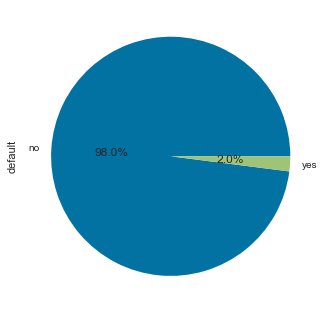

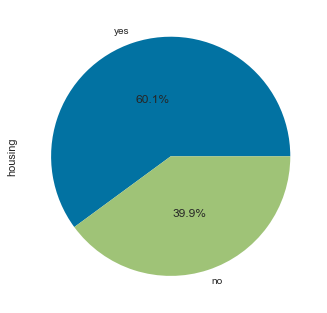

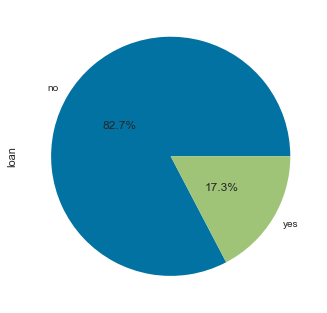

In [20]:
for col in df[['default','housing','loan']].columns.values.tolist():
    plt.figure()
    df[col].value_counts().plot.pie(autopct="%.1f%%", pctdistance=0.5)

##### From the above pie charts , we can make the following observations:
    * defalut variable: The majority of clients haven't a credit in default (98%).
    * housing variable: About 60.1% of clients have a housing loan.
    * loan variable: About 82.7% of clients haven't a personal loan.

### c- Histogram of continuous values

* Quantitative variables

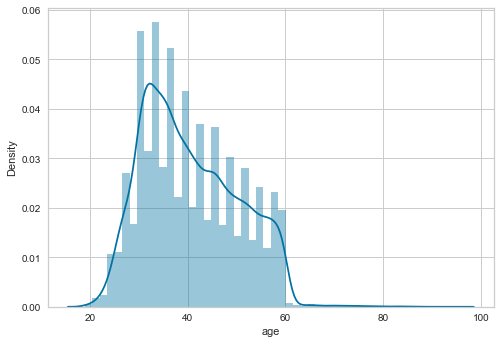

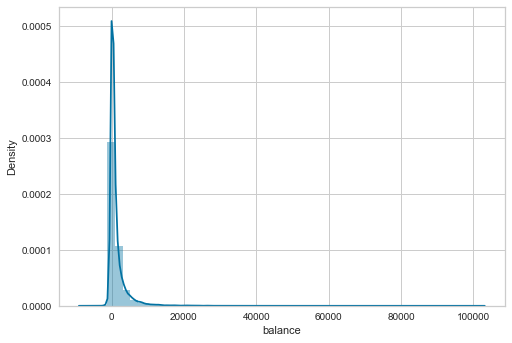

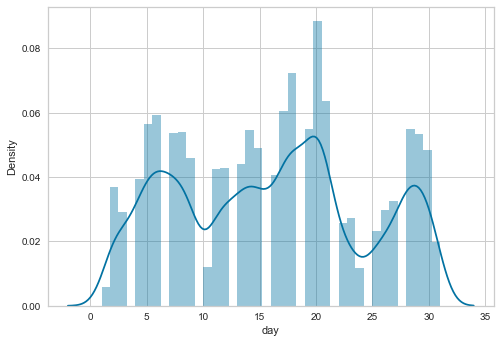

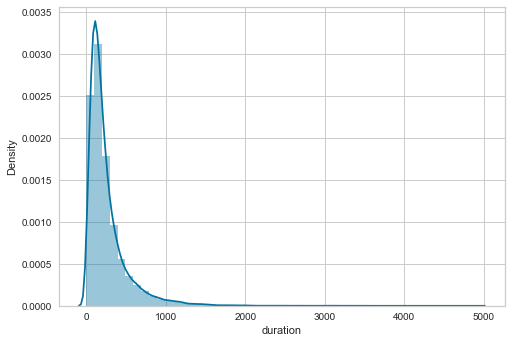

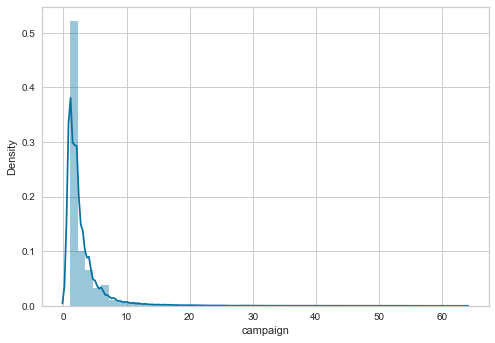

In [21]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

From the histograms below, we can infer that:
- Most of the customers are aged between 30 and 40.
- Most of the customers haven't the highest value of balance.
- Day 20 is the most day when clients reply to calls.
- The duration value is mostly the lowest, it's normal as clients love always to not talk too much.
- Most of the campaigns are between 0 and 10 campaigns.

### 2- Bivariate Analysis

### a- Numeric-Numeric Analysis: 
Let's  analyze our dataset by taking two or three numerical columns into consideration from a dataset.   
****Noting that our numerical variables are: age, balance, day, duration and compaign.**

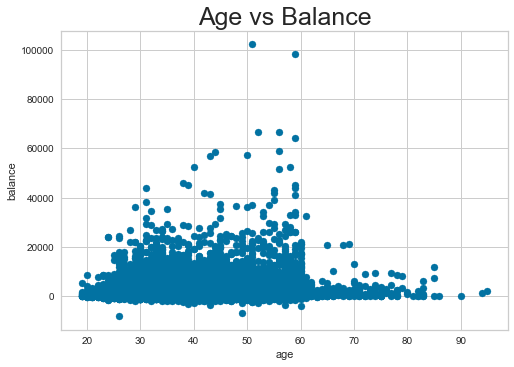

In [22]:
#plot the scatter plot of balance and age variables in the data
plt.scatter(df.age,df.balance)
plt.xlabel('age')
plt.ylabel('balance')
plt.title("Age vs Balance",fontsize=25)
plt.show()

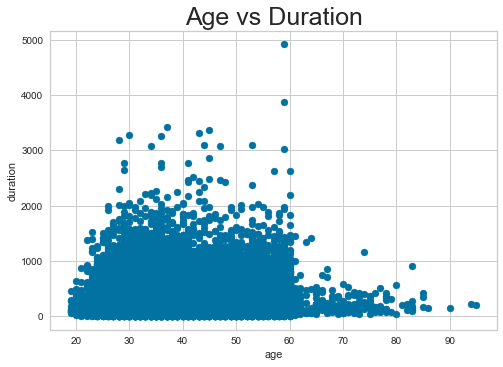

In [23]:
#Age vs duration
plt.scatter(df.age,df.duration)
plt.xlabel('age')
plt.ylabel('duration')
plt.title("Age vs Duration",fontsize=25)
plt.show()

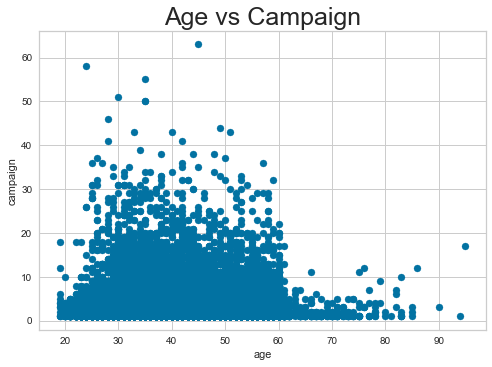

In [24]:
#Age vs campaign
plt.scatter(df.age,df.campaign)
plt.xlabel('age')
plt.ylabel('campaign')
plt.title("Age vs Campaign",fontsize=25)
plt.show()

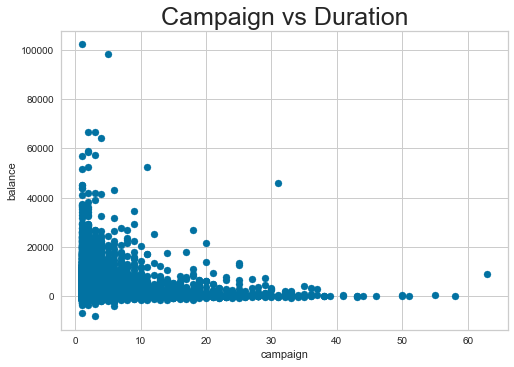

In [25]:
# Campaign vs duration
plt.scatter(df.campaign,df.balance)
plt.xlabel('campaign')
plt.ylabel('balance')
plt.title("Campaign vs Duration",fontsize=25)
plt.show()

Since we can not use more than two variables as x-axis and y-axis in Scatter and Pair Plots, we’ll use the correlation matrix in a single graph.

These are possible combinations of our 5 numerical variables:
- age vs balance vs day: 
- age vs balance vs duration
- age vs balance vs campaign
- age vs day vs duration 
- age vs day vs campaign
- age vs duration vs campaign
- balance vs day vs duration
- balance vs day vs campaign
- balance vs duration vs campaign
- day vs duration vs campaign

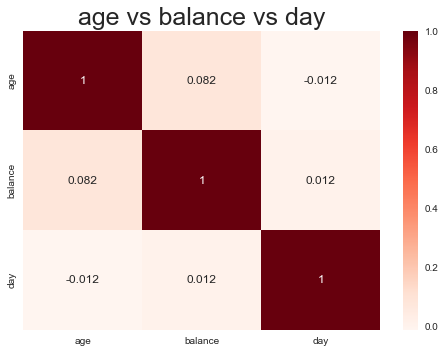

In [26]:
#plot the correlation matrix of:  age vs balance vs day
sns.heatmap(data[['age','balance','day']].corr(), annot=True, cmap = 'Reds')
plt.title("age vs balance vs day",fontsize=25)
plt.show()

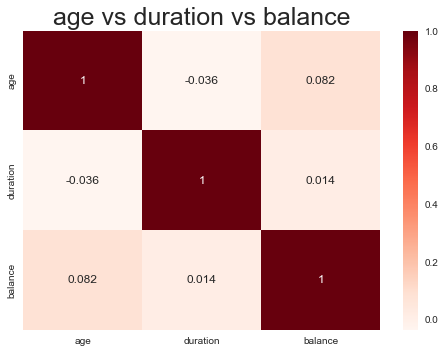

In [27]:
#plot the correlation matrix of age vs balance vs duration
sns.heatmap(data[['age','duration','balance']].corr(), annot=True, cmap = 'Reds')
plt.title("age vs duration vs balance",fontsize=25)
plt.show()

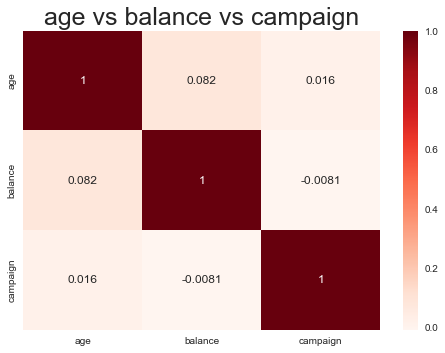

In [28]:
#plot the correlation matrix of age vs balance vs campaign
sns.heatmap(data[['age','balance','campaign']].corr(), annot=True, cmap = 'Reds')
plt.title("age vs balance vs campaign",fontsize=25)
plt.show()

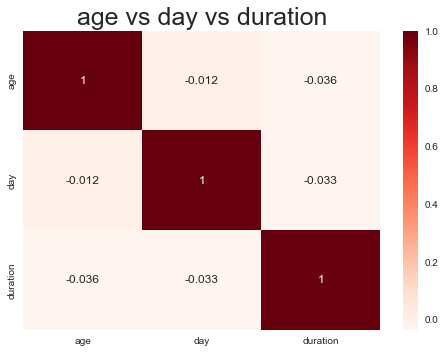

In [29]:
#plot the correlation matrix of age vs day vs duration 
sns.heatmap(data[['age','day','duration']].corr(), annot=True, cmap = 'Reds')
plt.title("age vs day vs duration",fontsize=25)
plt.show()

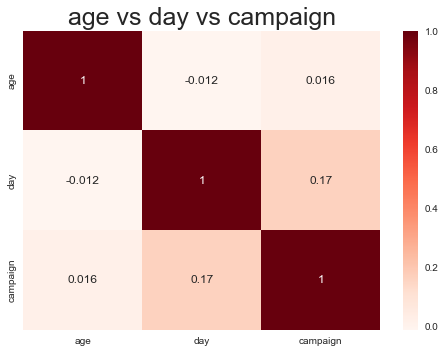

In [30]:
#plot the correlation matrix of age vs day vs campaign
sns.heatmap(data[['age','day','campaign']].corr(), annot=True, cmap = 'Reds')
plt.title("age vs day vs campaign",fontsize=25)
plt.show()

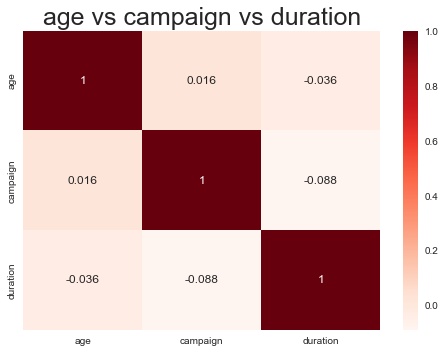

In [31]:
#plot the correlation matrix of age vs duration vs campaign
sns.heatmap(data[['age','campaign','duration']].corr(), annot=True, cmap = 'Reds')
plt.title("age vs campaign vs duration",fontsize=25)
plt.show()

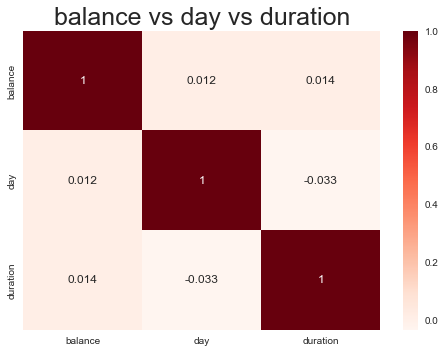

In [32]:
#plot the correlation matrix of balance vs day vs duration
sns.heatmap(data[['balance','day','duration']].corr(), annot=True, cmap = 'Reds')
plt.title("balance vs day vs duration",fontsize=25)
plt.show()

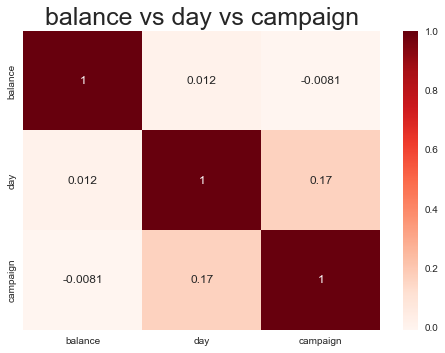

In [33]:
#plot the correlation matrix of balance vs day vs campaign
sns.heatmap(data[['balance','day','campaign']].corr(), annot=True, cmap = 'Reds')
plt.title("balance vs day vs campaign",fontsize=25)
plt.show()

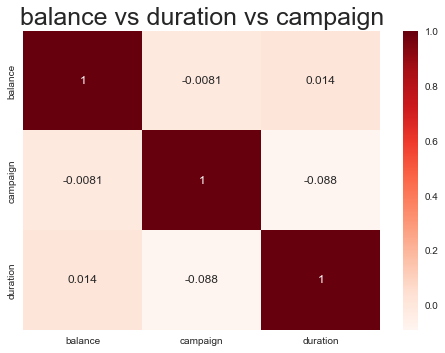

In [34]:
#plot the correlation matrix of balance vs duration vs campaign
sns.heatmap(data[['balance','campaign','duration']].corr(), annot=True, cmap = 'Reds')
plt.title("balance vs duration vs campaign",fontsize=25)
plt.show()

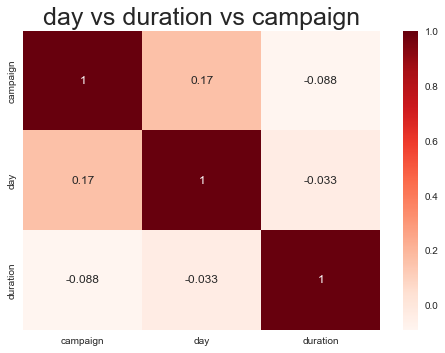

In [35]:
#plot the correlation matrix of day vs duration vs campaign
sns.heatmap(data[['campaign','day','duration']].corr(), annot=True, cmap = 'Reds')
plt.title("day vs duration vs campaign",fontsize=25)
plt.show()

From all these confsuion matrix plots, we can infer that balance and age are more correlated, also campaign and age , campaign and day, and balance and duration.

### b- Numeric - Categorical Analysis
Analyzing one numeric variable and one categorical variable from our dataset. We analyze them mainly using mean, median, and box plots.
Remember that our categorical variables are: job, marital, education, default, housing, loan, contact, month, y

Let’s take some examples from our dataset.

In [36]:
#group the balance by the target y
df.groupby('y')['balance'].mean()

y
no     1249.752533
yes    1588.495856
Name: balance, dtype: float64

In [37]:
#group the duration by the target y
df.groupby('y')['duration'].mean()

y
no     221.408042
yes    682.958564
Name: duration, dtype: float64

* From these two codes above, we can infer that customers who subsecribed have the highest mean of balance and also for the duration. 

* If we apply the mean or the median on the age, day and campaign variables, we'll not see a much big difference between results, so let’s plot the box plot for them and check the behavior.

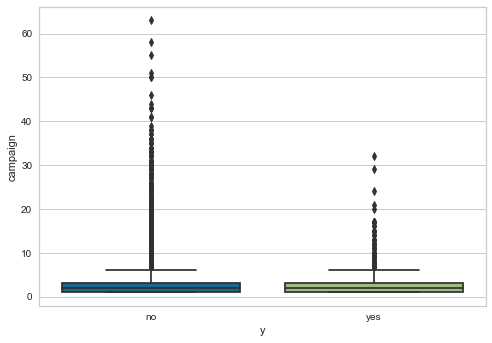

In [38]:
#plot the box plot of campaign for y target.
sns.boxplot(df.y, df.campaign)
plt.show()

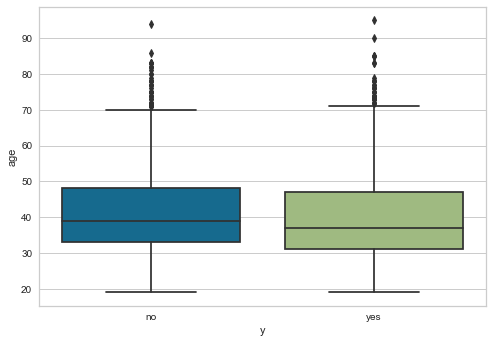

In [39]:
#plot the box plot of age for y target.
sns.boxplot(df.y, df.age)
plt.show()

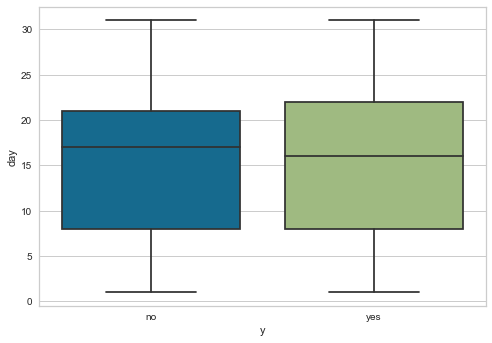

In [40]:
#plot the box plot of campaign for y target.
sns.boxplot(df.y, df.day)
plt.show()

* We can't infer anyting from the first box plot
* The IQR for customers who didn't subscribe is on the higher age side.
* The IQR for customers who subscribed is on the higher day side.

### c- Categorical — Categorical Analysis
Since our target column is the y, we’ll see how different categories like job, marital, education, default, housing, loan, contact, month, are associated with the target column. So instead of ‘Yes’ and ‘No’, we will convert them into ‘1’ and ‘0’. By doing that, we’ll get the “subscription_rate”.

In [41]:
df['subscription_rate'] = np.where(df.y=='yes',1,0)
df.subscription_rate.value_counts()

0    37104
1     2896
Name: subscription_rate, dtype: int64

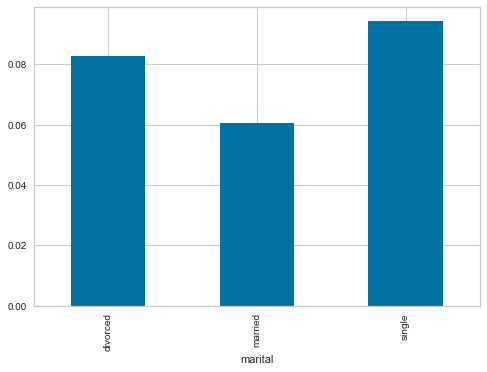

In [42]:
#plot the bar graph of marital status with average value of subscription_rate
df.groupby('marital')['subscription_rate'].mean().plot.bar()
plt.show()

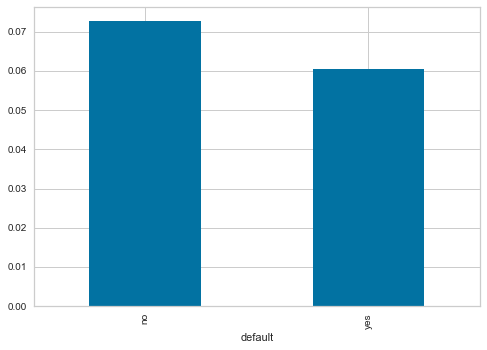

In [43]:
#plot the bar graph of default status with average value of subscription_rate
df.groupby('default')['subscription_rate'].mean().plot.bar()
plt.show()

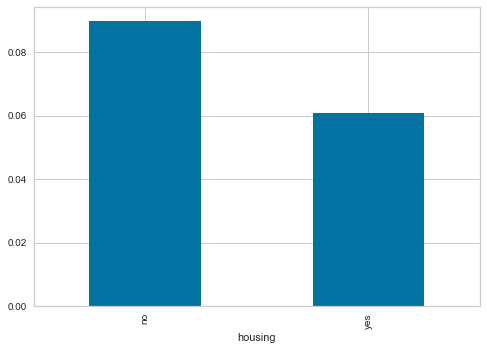

In [44]:
#plot the bar graph of housing status with average value of subscription_rate
df.groupby('housing')['subscription_rate'].mean().plot.bar()
plt.show()

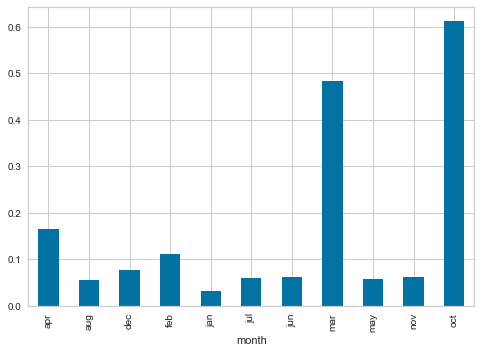

In [45]:
df.groupby('month')['subscription_rate'].mean().plot.bar()
plt.show()

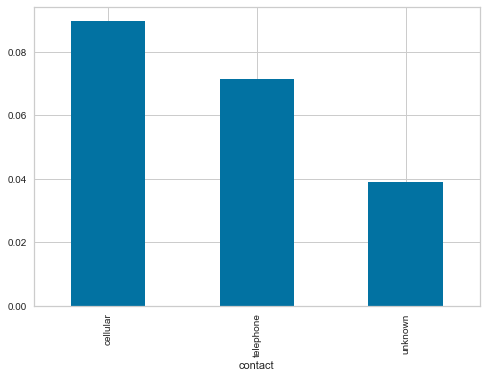

In [46]:
df.groupby('contact')['subscription_rate'].mean().plot.bar()
plt.show()

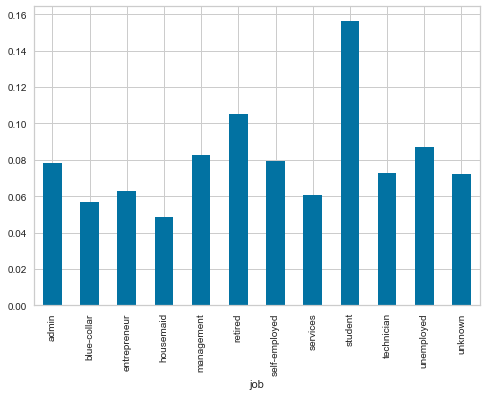

In [47]:
df.groupby('job')['subscription_rate'].mean().plot.bar()
plt.show()

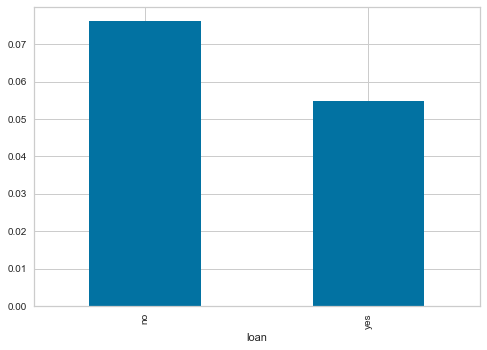

In [48]:
df.groupby('loan')['subscription_rate'].mean().plot.bar()
plt.show()

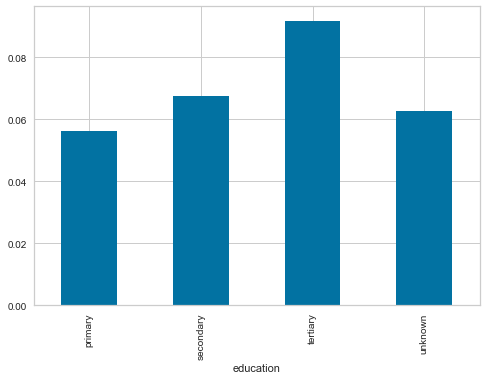

In [49]:
df.groupby('education')['subscription_rate'].mean().plot.bar()
plt.show()

#### Results:
 By the above graphs, we can infer that the rate of subscription is more for:
  -  Single marital status customers in the data set. 
  -  Student job status customers 
  -  tertiary education status customers 
  -  customers with no loan
  -  customers with cellular contact
  -  the October month 
  -  customers with no housing loan
  -  customers with no credit in default

### 3- Quantitative variables/target Relashionship   

* Creation of negative and positive subsets 

In [50]:
df_positive=df[df['y']=='yes']
df_negative=df[df['y']=='no']

*  Plot graphs to see the relationship between age, day, duration, balance and campaign features and the target y

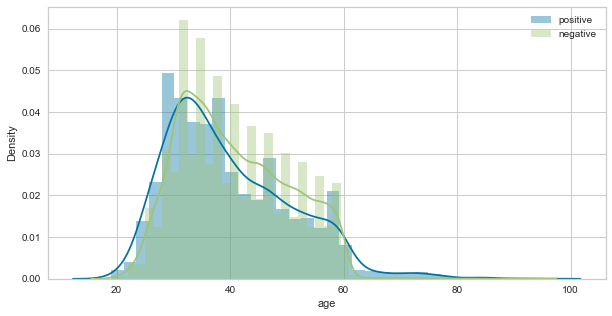

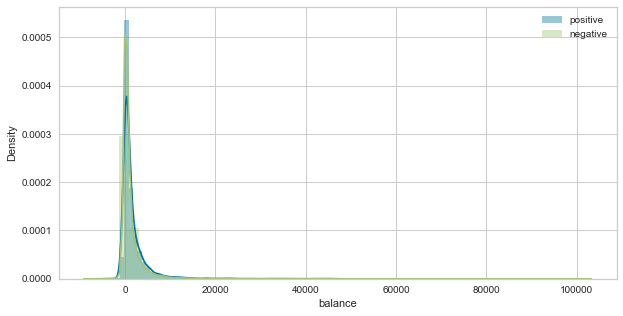

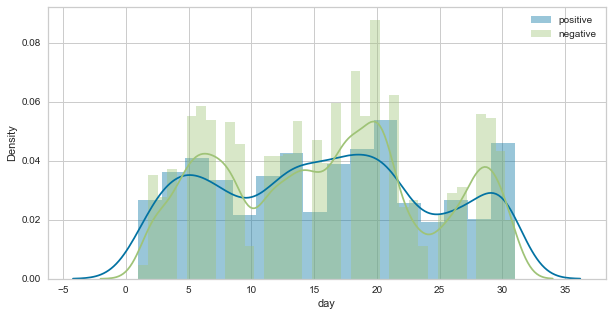

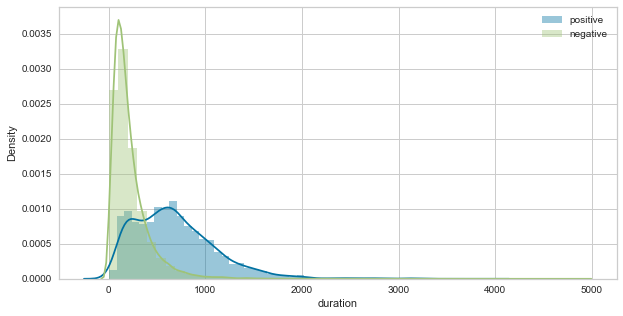

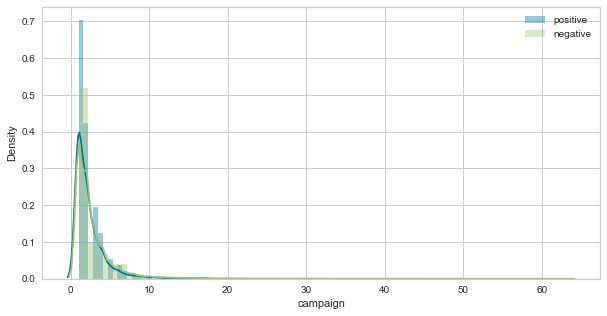

In [51]:
for col in df.select_dtypes('int64'): 
    plt.figure(figsize=(10,5))
    sns.distplot(df_positive[col],label='positive')
    sns.distplot(df_negative[col],label='negative')
    plt.legend()

*  Remarks:
            - The rate of duration seems related to the subscription of customers.   
            - We can't infer something special from other graphs.

### 4- Multivariate Analysis

Let’s see how ‘education’, ‘marital’, and ‘y’ vary with each other.
First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

marital    divorced   married    single
education                              
primary    0.093558  0.047560  0.079284
secondary  0.074981  0.058280  0.084207
tertiary   0.093394  0.076179  0.115424
unknown    0.077465  0.059536  0.065327


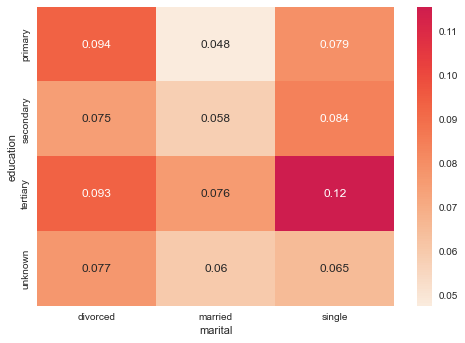

In [52]:
result = pd.pivot_table(data=df, index='education', columns='marital',values='subscription_rate')
print(result)

#create heat map of education vs marital vs subscription_rate
sns.heatmap(result, annot=True, cmap=sns.cm.rocket_r, center=0.117)
plt.show()

#### Based on this Heatmap, we can infer that the married customers with primary education are less likely to subscribe to a term deposit and single customers with tertiary education are more likely to subscribe to a term deposit.

marital        divorced   married    single
job                                        
admin          0.091176  0.066438  0.091156
blue-collar    0.068493  0.049711  0.078669
entrepreneur   0.066667  0.056974  0.085586
housemaid      0.050000  0.041975  0.094017
management     0.091356  0.072266  0.099308
retired        0.173432  0.092421  0.047619
self-employed  0.096774  0.057671  0.126685
services       0.074906  0.049673  0.077706
student        0.000000  0.100000  0.162500
technician     0.059361  0.062655  0.092854
unemployed     0.101351  0.072441  0.109034
unknown        0.066667  0.066667  0.090909


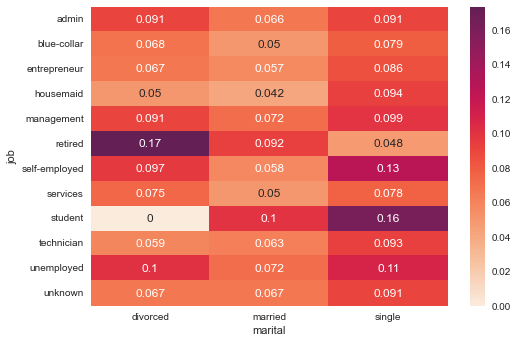

In [53]:
result = pd.pivot_table(data=df, index='job', columns='marital',values='subscription_rate')
print(result)
sns.heatmap(result, annot=True, cmap=sns.cm.rocket_r, center=0.117)
plt.show()

**Based on the Heatmap above, we can infer that the married people with housemaid job are less likely to subscribe to a term deposit and divorced people with retired job are more likely to subscribe to a term deposit.**

loan                 no       yes
job                              
admin          0.081149  0.066890
blue-collar    0.056728  0.058363
entrepreneur   0.068246  0.045714
housemaid      0.051064  0.034014
management     0.087654  0.054054
retired        0.120281  0.046980
self-employed  0.079564  0.077273
services       0.064098  0.048721
student        0.159223  0.000000
technician     0.077622  0.049393
unemployed     0.091908  0.038835
unknown        0.064935  0.500000


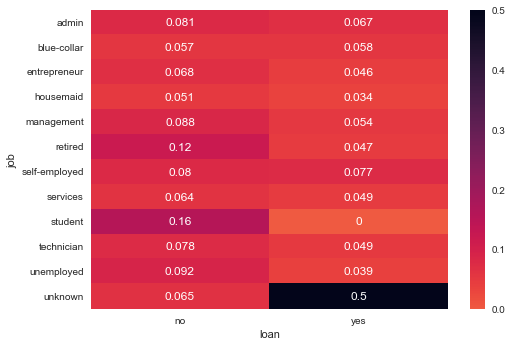

In [54]:
result = pd.pivot_table(data=df, index='job', columns='loan',values='subscription_rate')
print(result)
sns.heatmap(result, annot=True, cmap=sns.cm.rocket_r, center=0.117)
plt.show()

**Based on the Heatmap above, we can infer that students with personal loan are less likely to subscribe to a term deposit and unkown job people with personal loan are more likely to subscribe to a term deposit.**

housing              no       yes
job                              
admin          0.099612  0.067075
blue-collar    0.064490  0.054378
entrepreneur   0.074681  0.054907
housemaid      0.048023  0.050132
management     0.099552  0.068208
retired        0.126144  0.059471
self-employed  0.083700  0.075034
services       0.070117  0.056785
student        0.221053  0.079498
technician     0.086445  0.061872
unemployed     0.113752  0.056311
unknown        0.071429  0.080000


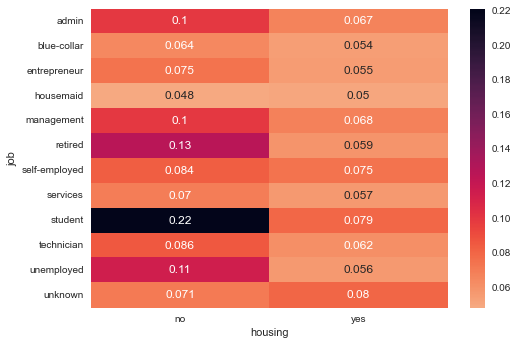

In [55]:
result = pd.pivot_table(data=df, index='job', columns='housing',values='subscription_rate')
print(result)
sns.heatmap(result, annot=True, cmap=sns.cm.rocket_r, center=0.117)
plt.show()

**Based on the Heatmap above, we can infer that technician people with housing loan are less likely to subscribe to a term deposit and student people without housing loan are more likely to subscribe to a term deposit.**

education       primary  secondary  tertiary   unknown
job                                                   
admin          0.044554   0.077088  0.119512  0.040541
blue-collar    0.049279   0.060848  0.118110  0.059226
entrepreneur   0.056818   0.069034  0.057099  0.081081
housemaid      0.048649   0.040580  0.068027  0.050000
management     0.040293   0.067502  0.087146  0.074074
retired        0.105155   0.084337  0.170306  0.084746
self-employed  0.031008   0.063406  0.101140  0.064516
services       0.068452   0.059957  0.047059  0.081481
student        0.277778   0.152482  0.173333  0.108108
technician     0.047297   0.066207  0.098707  0.023364
unemployed     0.100000   0.075563  0.105263  0.083333
unknown        0.044444   0.083333  0.038462  0.086538


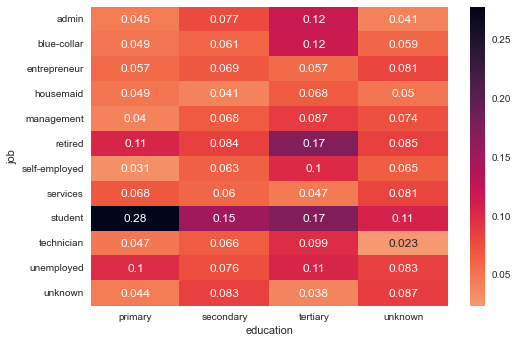

In [56]:
result = pd.pivot_table(data=df, index='job', columns='education',values='subscription_rate')
print(result)
sns.heatmap(result, annot=True, cmap=sns.cm.rocket_r, center=0.117)
plt.show()

**Based on the Heatmap above, we can infer that technician people with unknown eduact=ation status are less likely to subscribe to a term deposit and student people with primary education level are most likely to subscribe to a term deposit.**

### **Make an analysis report using the Sweetvis library

In [57]:
#analyzing the dataset
advert_report = sv.compare([df_positive, 'positive'], [df_negative, 'negative'])
#display the report
advert_report.show_html('negative_positive.html')

                                             |                                             | [  0%]   00:00 ->…

Report negative_positive.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 5-  Remove outliers

Before starting the modeling step, we should handle outliers. As we can see from the previous plots, there are a lot of outliers. Let's remove them.
We'll use the **z-score** method. We will use a threshold equal to 3.

In [96]:
#remove outliers with z-score method
z = np.abs(stats.zscore(df.select_dtypes('int64')))
df_new= df[(abs(z) < 3).all(axis=1)]

In [59]:
df_new.shape

(37583, 15)

### 6- Applying the Smote method to balance our dataset

Because our dataset is imbalanced, so we should use some techniques to handle this problem.
Let's use the SMOTE upsampling technique.    
We should first split the dataset into train and test sets. But before that, we should convert categorical columns into numeric variables to use the SMOTE method.

* Convert categorical columns to numeric values using dictionary structure

In [60]:
#First, store categorical variables and their unique values in dictionaries
L= [i for i in df_new.select_dtypes('object') ]
for i in L:
    a=0
    d={}
    for j in set(df_new[i]):
        d[j]=a
        a=a+1
    print ("dict_",i,"=",d,"\n")

dict_ job = {'blue-collar': 0, 'admin': 1, 'self-employed': 2, 'housemaid': 3, 'technician': 4, 'management': 5, 'entrepreneur': 6, 'retired': 7, 'unemployed': 8, 'student': 9, 'unknown': 10, 'services': 11} 

dict_ marital = {'single': 0, 'divorced': 1, 'married': 2} 

dict_ education = {'tertiary': 0, 'unknown': 1, 'secondary': 2, 'primary': 3} 

dict_ default = {'yes': 0, 'no': 1} 

dict_ housing = {'yes': 0, 'no': 1} 

dict_ loan = {'yes': 0, 'no': 1} 

dict_ contact = {'unknown': 0, 'telephone': 1, 'cellular': 2} 

dict_ month = {'nov': 0, 'jul': 1, 'jun': 2, 'apr': 3, 'aug': 4, 'dec': 5, 'oct': 6, 'mar': 7, 'may': 8, 'feb': 9, 'jan': 10} 

dict_ y = {'yes': 0, 'no': 1} 



In [61]:
# Creat dictionaries to store unique values of each category
dict_job = {'self-employed': 0, 'unemployed': 1, 'unknown': 2, 'entrepreneur': 3, 'admin': 4, 'technician': 5, 'management': 6, 'housemaid': 7, 'retired': 8, 'student': 9, 'services': 10, 'blue-collar': 11} 
dict_marital = {'married': 0, 'divorced': 1, 'single': 2} 
dict_education = {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3} 
dict_default = {'yes': 0, 'no': 1} 
dict_housing = {'yes': 0, 'no': 1} 
dict_loan = {'yes': 0, 'no': 1} 
dict_contact = {'cellular': 0, 'telephone': 1, 'unknown': 2} 
dict_month = {'jan': 0, 'feb': 1, 'oct': 2, 'aug': 3, 'jun': 4, 'dec': 5, 'mar': 6, 'nov': 7, 'may': 8, 'apr': 9, 'jul': 10} 

In [62]:
#change the values of categorical columns
df_new['job']=df_new['job'].map(dict_job) 
df_new['education']=df_new['education'].map(dict_education) 
df_new['marital']=df_new['marital'].map(dict_marital) 
df_new['loan']=df_new['loan'].map(dict_loan) 
df_new['contact']=df_new['contact'].map(dict_contact) 
df_new['month']=df_new['month'].map(dict_month) 
df_new['housing']=df_new['housing'].map(dict_housing) 
df_new['default']=df_new['default'].map(dict_default) 

In [63]:
#Assure that the dataframe was rightly changed
df_new=df_new.drop('y', axis=1) 

In [64]:
df_new.tail()

age  job  marital  education  default  balance  housing  loan  contact  \
39995   53    5        0          2        1      395        1     1        0   
39996   30    6        2          2        1     3340        1     1        0   
39997   54    4        1          1        1      200        1     1        0   
39998   34    6        0          2        1     1047        1     1        0   
39999   38    5        0          1        1     1442        0     1        0   

       day  month  duration  campaign  subscription_rate  
39995    3      4       107         1                  0  
39996    3      4       238         3                  1  
39997    3      4       170         1                  1  
39998    3      4       342         1                  0  
39999    3      4       113         1                  0

* By the above cells, we can see that the dataframe was succesfully changed with numeric values affected to each category, over the dictionaries created.
* Now, let's split our dataset into train and test sets. Let's use 20% as our test size.

In [65]:
np.random.seed(1)
X=df_new.drop(['subscription_rate'], axis=1) # select the features of our dataset
Y=df_new['subscription_rate'] # select the target Y
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2)

In [66]:
X.tail()

age  job  marital  education  default  balance  housing  loan  contact  \
39995   53    5        0          2        1      395        1     1        0   
39996   30    6        2          2        1     3340        1     1        0   
39997   54    4        1          1        1      200        1     1        0   
39998   34    6        0          2        1     1047        1     1        0   
39999   38    5        0          1        1     1442        0     1        0   

       day  month  duration  campaign  
39995    3      4       107         1  
39996    3      4       238         3  
39997    3      4       170         1  
39998    3      4       342         1  
39999    3      4       113         1

Let's see the number of samples in each class for our train set. This result improve the imbalanced issue in our case.

In [67]:
unique, count =np.unique(Y_train, return_counts=True)
Y_train_dict={ k:v for (k,v) in zip(unique, count)}
Y_train_dict

{0: 28227, 1: 1839}

* Now, we have all the necessary inputs to use the SMOTE method. 

In [68]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1839
Before OverSampling, counts of label '0': 28227 

After OverSampling, counts of label '1': 28227
After OverSampling, counts of label '0': 28227


We can see clearly that after applying the SMOTE method, the number of samples of the train positive set is upgraded to the same shape of the majority class. (1839 to 28227)

In [69]:
x_train_res["target"]=y_train_res

In [70]:
train=x_train_res
train.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   24   10        2          1        1       11        0     1        2   
1   54   11        0          0        1     1895        0     1        0   
2   29   11        0          1        1      844        0     1        2   
3   48   10        0          1        1        0        0     1        0   
4   38   10        0          1        1     -140        1     1        2   

   day  month  duration  campaign  target  
0   27      4       114         4       0  
1   17      9       345         1       0  
2   27      8       157         2       0  
3    2      9       146         1       0  
4   25      4       456         3       0

In [71]:
X_test['target']=Y_test

In [72]:
test=X_test
test.head()

age  job  marital  education  default  balance  housing  loan  contact  \
7428    29   11        2          1        1     -125        0     1        2   
22769   35    5        1          1        1        0        1     1        0   
20875   54    6        0          2        1      588        1     1        0   
25283   42    6        2          2        1     1673        1     1        0   
142     57    1        0          2        1       42        1     1        2   

       day  month  duration  campaign  target  
7428    29      8       198         3       0  
22769   25      3       124         4       0  
20875   13      3       327         1       0  
25283   18      7        43         2       0  
142      5      8        46         1       0

In [73]:
print("new test shape:",test.shape)
print("new train shape:",train.shape)

new test shape: (7517, 14)
new train shape: (56454, 14)


* From the above codes, we can see clearly that the new train dataset after applying the SMOTE is evenly distributed.
### Now after completing the EDA step, let's move to the next step which is Modeling.

### II- Modeling
### 1- Select basic models using pycaret library
In this step, we'll use the AutoML pycaret library to test various classification models on our dataset.

In [74]:
#store categorical values except the target y 
cat_features=df.select_dtypes('object').columns.values.tolist()[:-1]
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

In [75]:
#with pycaret, you don't need to split your dataset, just define the splitting size as a parameter
df_pycaret=pd.concat([train,test], axis=0)

To start with, we should call the setup function that initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.     
it must be called before executing any other function. Also, it must takes two necessary arguments: **data** wich is your defined dataset and **target** wich is the targer feature in your dataset.      
At the meantime, you can add other paramethers like **traine_size** if you want pycaret to split your dataset, **categorical_features** if you have categorical features if your dataset, **session_id** to set a seed number , and so on.    
NB: for other features, you can see the tableau below and customize your setup function.
Let's do this!

In [76]:
experiment_cluster= setup(data = df_pycaret, target = 'target',train_size = 0.8, session_id=122, categorical_features=cat_features)

After calling the setup function, we'll train all the models in the model library and scores them using the cross validation for metric evaluation by using only one line of code. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [77]:
#The best model is going to be stored in the best_model variable
best_model=compare_models()

From the above cell, we can see that the best model is the Random Forest Classifier with the following scores:     
* Accuracy: 0.9496
* Recall: 0.9545
* Precision: 0.9345
* **F1 Score**: 0.9444

In [78]:
#evaluate our best model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

By using the code above, we can explore different plots of the best_model's evaluation.

In [79]:
predictions=predict_model(best_model)

In [80]:
for i in ['Accuracy','F1','Recall','Precision']:
    print(i," :", check_metric(predictions['target'], predictions['Label'], metric = i))

Accuracy  : 0.9503
F1  : 0.9449
Recall  : 0.9572
Precision  : 0.933


From the above cell, we can infer that the accuracy of the test unseen dataset is highest. Because we fixed the problem of the imbalanced data, we can consider the accuracy as a good metric for this project.     

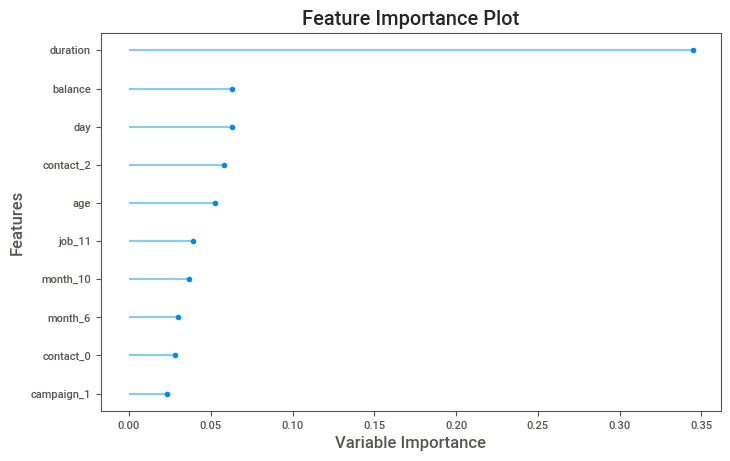

In [81]:
# See the feature importance 
plot_model(best_model, plot='feature')

We can infer from the plot above, that the duration is the most important feature in our dataset.   
This confirms the proposal mentionned before about the importance of the duration feature for the prediction. So the company must give more importance to the duration of calls.

##### Store the model 

In [82]:
save_model(best_model,'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['job', 'marital',
                                                             'education',
                                                             'default',
                                                             'housing', 'loan',
                                                             'contact',
                                                             'month'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_availa...
                  RandomForestClassifier(bootstrap=True, ccp_alp

Now, let's choose some of these fitted models and then use ensemble Learning methods to see if we can improve more the result.

### 2- Apply Ensemble Learning methods
Let's define split datasets as train and test. 

In [83]:
X_train=train.drop('target',axis=1)
Y_train=train['target']
X_test=test.drop('target',axis=1)
Y_test=test['target']

* Let's define the chosen models from the previous section: RandomForest, KNN, Logistic regression and GaussNB models, as well as the voting using hard voting to reduce the noise, and the stacking technique using DecisionTree as a base model. 
Noting that the choice was arbitrary, just to test the effect of ensemble learning using different types of models.

In [84]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=1)
knn_model=KNeighborsClassifier(n_neighbors=2)
lg_model= LogisticRegression(random_state=1)
GaussNB_model= GaussianNB()
voting_model_hard=VotingClassifier([('lr',lg_model),('rf',rf_model),('gnb',GaussNB_model),('knn',knn_model)],voting='hard')
stacking_model_dt=StackingClassifier([('lr',lg_model),('rf',rf_model),('gnb',GaussNB_model),('knn',knn_model)],final_estimator=DecisionTreeClassifier())

Let's fitt these models to our dataset

In [85]:
for model in (rf_model,knn_model,lg_model,GaussNB_model,voting_model_hard,stacking_model_dt ):
    model.fit(X_train,Y_train)
    print(model.__class__.__name__, model.score(X_test,Y_test))

RandomForestClassifier 0.9199148596514567
KNeighborsClassifier 0.8655048556605028
LogisticRegression 0.8426233869894905
GaussianNB 0.7983237993880538
VotingClassifier 0.9110017294133298
StackingClassifier 0.9248370360516164


In [86]:
for model in (rf_model,knn_model,lg_model,GaussNB_model,voting_model_hard,stacking_model_dt ):
        model.fit(X_train,Y_train)
        Y_pred =model.predict(X_test)
        print("\n report of the model: ",model.__class__.__name__,"\n", metrics.classification_report(Y_test, Y_pred),"\n")


 report of the model:  RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      7086
           1       0.36      0.51      0.42       431

    accuracy                           0.92      7517
   macro avg       0.66      0.73      0.69      7517
weighted avg       0.93      0.92      0.93      7517
 


 report of the model:  KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      7086
           1       0.16      0.32      0.22       431

    accuracy                           0.87      7517
   macro avg       0.56      0.61      0.57      7517
weighted avg       0.91      0.87      0.89      7517
 


 report of the model:  LogisticRegression 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      7086
           1       0.22      0.69      0.34       431

    accuracy                         

From the cell above, we can see that the best model is the StackingClassifier with an accuracy of 93%. 
We can make a remark that after applying the voting and the stacking methods, the 

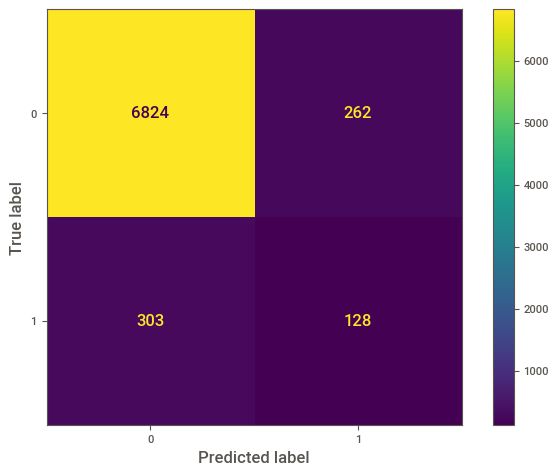

In [87]:
plot_confusion_matrix(stacking_model_dt, X_test, Y_test)  
plt.show()

In [88]:
#it's normal to get a low score for the precision or F1-score of the class 0, we can see that just 5% of test data that have the class 1;
print(train['target'].value_counts(normalize=True))
print(test['target'].value_counts(normalize=True))

1    0.5
0    0.5
Name: target, dtype: float64
0    0.942663
1    0.057337
Name: target, dtype: float64


### 3- Clustering the customers using K_means and plotly

* It will be a good thing to find customers who are more likely to buy the investment product. Let's determine the segment of customers the client should prioritize.

In [89]:
#copy the dataset after applying smote
data=df_pycaret.copy()

In [90]:
#choose positive labels
pos_customers=data[data['target']==1]

In [91]:
#Determine X and Y 
X=pos_customers.drop('target',axis=1)
Y=pos_customers['target']

Now, to use K-means model, it would be better if we use fist the Elbow method, to find the optimized value of clusters k.

In [92]:
#Calculate inertia for each value of k
inertia=[]
for i in range(1,15):
    km=KMeans(n_clusters=i)
    km.fit(X)
    inertia.append(km.inertia_)

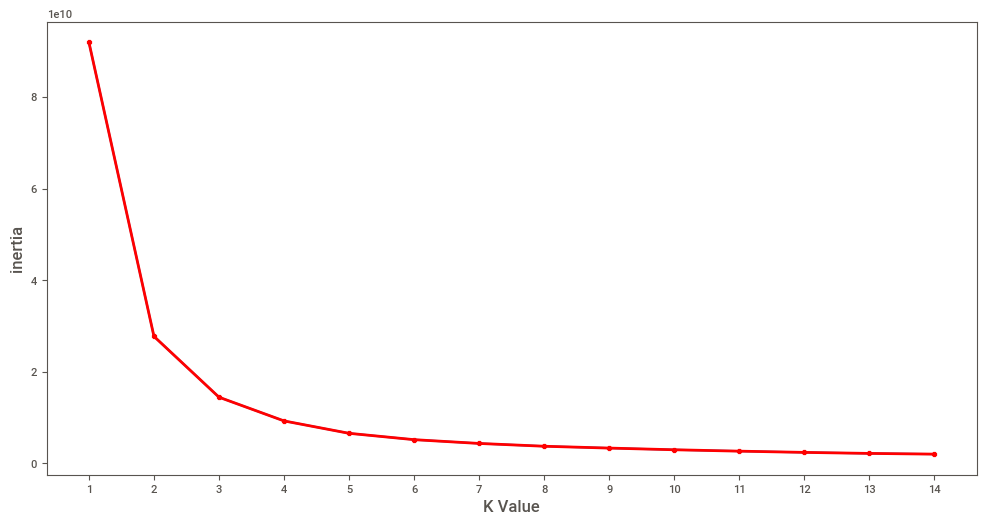

In [93]:
#plot he elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,15),inertia)
plt.plot(range(1,15),inertia, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("inertia")
plt.show()

**From the plot above, we can choose the optimized k value which is k=4. SO, let's apply k-means with k=4**

In [94]:
#Taking 4 clusters
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
pos_customers["label"] = y
#The new dataframe with the clustering done
pos_customers.head()

age  job  marital  education  default  balance  housing  loan  contact  \
6    43   11        0          1        1      184        1     0        0   
7    32    6        2          2        1      311        1     1        2   
12   27    5        2          2        1     4661        1     1        0   
30   49    6        0          1        1       99        0     1        0   
58   33    4        2          1        1      315        0     0        0   

    day  month  duration  campaign  target  label  
6    16     10      1019        11       1      1  
7    12      8       757         2       1      1  
12    8      9       114         1       1      0  
30    6      8       687         2       1      1  
58   14      8       888         3       1      1

As we can see from the new dataframe above, a column called label is added, which contains the affected cluster of each row in the dataset.   
Now, let's plot the distribution of the clusters over the dataset using 3d plot with the plotly library. The choice of the features is based on their importance seen previously. So let's choose the duration, balance, and day features.


In [95]:
PLOT = go.Figure()
for C in list(pos_customers.label.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = pos_customers[pos_customers.label == C]['duration'],
                                y = pos_customers[pos_customers.label == C]['balance'],
                                z = pos_customers[pos_customers.label == C]['day'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'duration', titlefont_color = 'black'),
                                yaxis=dict(title = 'balance', titlefont_color = 'black'),
                                zaxis=dict(title = 'day', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

From the plot above, we can see clearly the four clusters created, regarding the 3 chosen features.       
We can infer that the customers are clustered based on their balance  

## Conclusion

In this project, I started by exploring and visualizing the dataset using different techniques. After assuring that the data is pretty cleaned, I was able to analyze the relationship between most of the features of our dataset and especially with the target variable. I used different graphs and plots to analyze and understand well the dataset and also I used the pretty reporting library sweetviz which summarizes most of the statistical analysis.
After that, I removed most of the existing outliers in the data, and then I handled the imbalanced issue using the upsampling SMOTE method.    
After completing the EDA step, I passed to the next step which is the Modeling phase.  
For this purpose, I used first the Pycaret library which trains several important machine learning models to our dataset. The pycaret library helps to explore different essential plots and conclusions about the model selected like the confusion matrix, the Precision recall curve, the feature selection, and so on.  
After that, I chose some of the best models detected to test separately each one and then apply Ensemble Learning models such as Voting and stacking.    
The best model selected was the StackingClassifier with an accuracy of 93%.   
To finalize the work, I used the unsupervised K-means model to cluster the customers in a 3D plot using the plotly library. I was able to see the clustering based on the most important 3 features of our dataset.     
** An important thing to say is that the duration feature affects a lot the subscription of clients to a term deposit. And it's normal, as a customer who wants to subscribe will take more time to understand when buying a term deposit.   

# Hope it's beneficial !